In [37]:
# import all relevant libraries
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
import seaborn as sns

sns.set()
sns.set_style("white")
sns.set_palette("GnBu_d")


import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime  # for working with times objects
from datetime import timedelta  # for working with times objects
import geopandas as gpd
import math
import random

# Step 4: Working with Weather Data

In [38]:
# import the weather data
wd = pd.read_csv("SanFrancisco", encoding="ISO-8859-1", index_col=0)
# show first 20 rows
wd.head(20)

,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
city,,,,,,,,
San Francisco,2015-01-01 08:56:00,7.0,33.0,Fair,1018.26,6.0,0.0,7.0
San Francisco,2015-01-01 09:56:00,4.0,33.0,Fair,1018.60,6.0,0.0,4.0
San Francisco,2015-01-01 10:56:00,10.0,33.0,Fair,1018.60,28.0,0.0,10.0
San Francisco,2015-01-01 11:56:00,9.0,33.0,Fair,1018.60,19.0,0.0,7.0
San Francisco,2015-01-01 12:56:00,9.0,33.0,Fair,1018.60,20.0,0.0,6.0
San Francisco,2015-01-01 13:56:00,9.0,33.0,Fair,1018.94,15.0,0.0,6.0
San Francisco,2015-01-01 14:56:00,9.0,34.0,Fair,1019.62,28.0,0.0,5.0
San Francisco,2015-01-01 15:56:00,9.0,34.0,Fair,1019.96,22.0,0.0,6.0
San Francisco,2015-01-01 16:56:00,10.0,34.0,Fair,1020.63,19.0,0.0,10.0


In [39]:
# take a look at the data types and general information
wd.info()
wd.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 76631 entries, San Francisco to San Francisco
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                76631 non-null  object 
 1   temperature              76619 non-null  float64
 2   cloud_cover              76630 non-null  float64
 3   cloud_cover_description  76630 non-null  object 
 4   pressure                 76613 non-null  float64
 5   windspeed                76592 non-null  float64
 6   precipitation            76631 non-null  float64
 7   felt_temperature         76614 non-null  float64
dtypes: float64(6), object(2)
memory usage: 5.3+ MB


,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature
count,76619.000000,76630.000000,76613.000000,76592.000000,76631.000000,76614.000000
mean,14.645388,29.215020,1016.244545,16.562722,0.062102,14.534915
std,4.030852,5.110355,4.866743,11.432207,0.456781,4.203518
min,2.000000,4.000000,986.440000,0.000000,0.000000,-1.000000
25%,12.000000,27.000000,1013.190000,7.000000,0.000000,12.000000
50%,14.000000,29.000000,1015.890000,15.000000,0.000000,14.000000
75%,17.000000,33.000000,1019.280000,24.000000,0.000000,17.000000
max,39.000000,47.000000,1035.530000,391.000000,18.540000,37.000000


In [40]:
# convert timestamp to datetime
wd['timestamp'] = pd.to_datetime(wd['timestamp'],format ='%Y-%m-%d %H:%M:%S')

# extract the year from timestamp
wd['year'] = wd['timestamp'].dt.year

# only the data for the year 2019 is important, so we drop all the other entries.
wd = wd[wd['timestamp'].dt.year == 2019]

In [41]:
# check first 20 entries 
wd.head(20)

,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature,year
city,,,,,,,,,
San Francisco,2019-01-01 00:56:00,12.0,30.0,Partly Cloudy,1016.23,31.0,0.0,12.0,2019
San Francisco,2019-01-01 01:56:00,12.0,33.0,Fair / Windy,1016.57,35.0,0.0,12.0,2019
San Francisco,2019-01-01 02:56:00,12.0,33.0,Fair / Windy,1017.25,46.0,0.0,12.0,2019
San Francisco,2019-01-01 03:56:00,12.0,33.0,Fair / Windy,1017.25,44.0,0.0,12.0,2019
San Francisco,2019-01-01 04:56:00,11.0,33.0,Fair / Windy,1017.92,35.0,0.0,11.0,2019
San Francisco,2019-01-01 05:56:00,11.0,33.0,Fair / Windy,1017.59,52.0,0.0,11.0,2019
San Francisco,2019-01-01 06:56:00,10.0,33.0,Fair / Windy,1017.92,44.0,0.0,10.0,2019
San Francisco,2019-01-01 07:56:00,11.0,33.0,Fair,1018.60,30.0,0.0,11.0,2019
San Francisco,2019-01-01 08:56:00,11.0,33.0,Fair,1018.94,31.0,0.0,11.0,2019


In [42]:
# after transforming the data we check if there are any non-defined values.
wd.isna().sum()

timestamp                  0
temperature                3
cloud_cover                0
cloud_cover_description    0
pressure                   0
windspeed                  6
precipitation              0
felt_temperature           4
year                       0
dtype: int64

In [43]:
# drop all rows with missing values
weather_2019 = wd.dropna(axis = 0)
weather_2019.info()
weather_2019.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 9494 entries, San Francisco to San Francisco
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                9494 non-null   datetime64[ns]
 1   temperature              9494 non-null   float64       
 2   cloud_cover              9494 non-null   float64       
 3   cloud_cover_description  9494 non-null   object        
 4   pressure                 9494 non-null   float64       
 5   windspeed                9494 non-null   float64       
 6   precipitation            9494 non-null   float64       
 7   felt_temperature         9494 non-null   float64       
 8   year                     9494 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 741.7+ KB


,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature,year
count,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.0
mean,14.692753,28.796398,1015.035008,16.785338,0.079433,14.549821,2019.0
std,4.296878,5.498910,4.908431,11.103065,0.486799,4.491948,0.0
min,3.000000,4.000000,993.550000,0.000000,0.000000,1.000000,2019.0
25%,12.000000,27.000000,1012.510000,7.000000,0.000000,12.000000,2019.0
50%,14.000000,29.000000,1014.880000,15.000000,0.000000,14.000000,2019.0
75%,17.000000,33.000000,1017.920000,24.000000,0.000000,17.000000,2019.0
max,36.000000,40.000000,1030.790000,67.000000,11.940000,34.000000,2019.0


In [44]:
# extract the hours of the weather data and the data with idle time
df_w_idle_time = pd.read_csv('idle_time_calculated')

# Now we want to extract the hours of the weather data and match them with idle time
df_w_idle_time["timestamp"]= pd.to_datetime(df_w_idle_time["timestamp"],format ='%Y-%m-%d %H:%M:%S')
df_w_idle_time['timestamp'] = df_w_idle_time['timestamp'].dt.floor('H')
df_w_idle_time = df_w_idle_time[df_w_idle_time['rented'] == 0]

weather_2019['timestamp'] = weather_2019['timestamp'].dt.floor('H')

# Merge two tables 
df_features= pd.merge(df_w_idle_time, weather_2019, on='timestamp')

# convert idle_time to minutess
df_features['idle_time'] = pd.to_timedelta(df_features['idle_time']).dt.total_seconds() / 60.0

df_features

C:\Users\riven\AppData\Local\Temp/ipykernel_19092/3128207234.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_2019['timestamp'] = weather_2019['timestamp'].dt.floor('H')


,Unnamed: 0,timestamp,station_id,bike_id,rented,idle_time,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature,year
0,0,2019-01-01 01:00:00,3,5426,0,0.000000,12.0,33.0,Fair / Windy,1016.57,35.0,0.00,12.0,2019
1,85556,2019-01-01 01:00:00,5,5426,0,2.183333,12.0,33.0,Fair / Windy,1016.57,35.0,0.00,12.0,2019
2,341380,2019-01-01 01:00:00,14,5157,0,520.583333,12.0,33.0,Fair / Windy,1016.57,35.0,0.00,12.0,2019
3,341381,2019-01-01 01:00:00,14,4952,0,510.483333,12.0,33.0,Fair / Windy,1016.57,35.0,0.00,12.0,2019
4,564882,2019-01-01 01:00:00,19,5272,0,372.650000,12.0,33.0,Fair / Windy,1016.57,35.0,0.00,12.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2610954,4585658,2019-02-02 05:00:00,377,5159,0,153.166667,12.0,11.0,Light Rain,1001.68,17.0,0.51,12.0,2019
2610955,4711841,2019-10-16 02:00:00,408,6731,0,10.683333,13.0,33.0,Fair,1016.23,31.0,0.00,13.0,2019
2610956,4711843,2019-10-16 02:00:00,408,6731,0,8.933333,13.0,33.0,Fair,1016.23,31.0,0.00,13.0,2019
2610957,4711845,2019-10-16 02:00:00,408,6731,0,5.000000,13.0,33.0,Fair,1016.23,31.0,0.00,13.0,2019


In [45]:
# Now we want to investigate the correlation between all the available features and the target variable (idle time). This can be achieved using a heatmap
weather_features = df_features[['idle_time','temperature', 'cloud_cover', 'pressure', 'windspeed', 'precipitation','felt_temperature']]

<Axes: >

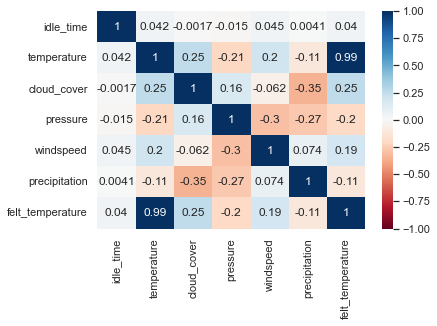

In [46]:
corr = weather_features.corr()
# Create the heatmap
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)

Looking at the heatmap, we can pick out the variables which are possibly correlated to idle time: temperature and windspeed. However, temperature and windspeed are also correlated (covariance 0.2) so we decided to only include temperature. The Cloud Cover Description, although not considered here, could also be interesting, which we will take a look at in the next steps.

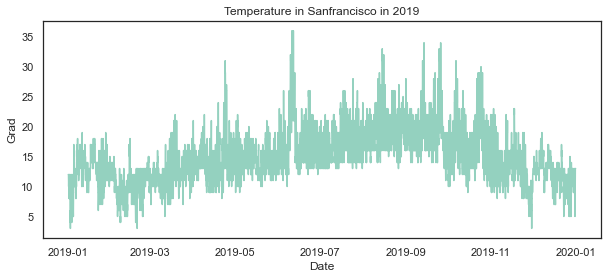

In [47]:
# let's have a look at the temperature in Sanfrancisco in 2019
fig,ax = plt.subplots(figsize=(10,4))
ax.plot(weather_2019["timestamp"],weather_2019["temperature"])
ax.set_xlabel("Date")
ax.set_ylabel("Grad")
ax.set_title("Temperature in Sanfrancisco in 2019")
plt.show()


Our goal is to find out how the weather affects the bike rent business. We want to analyze the correlation between different conditions of weather (e.g Temperature, Windspeed) and the idle time of bike stations.

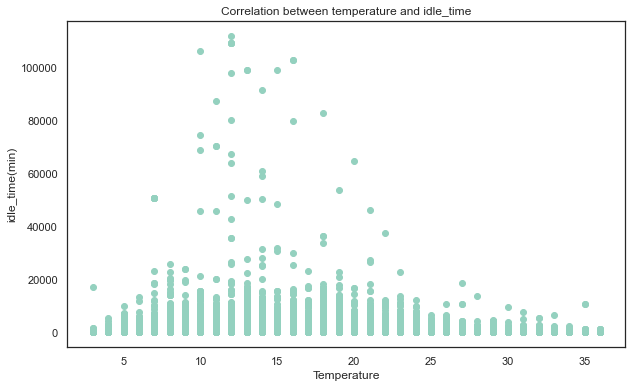

In [48]:
#Let's visualize the idle time with temperature
# first, let's create a figure object
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

# define plot
ax.scatter(df_features["temperature"], df_features["idle_time"])

# add axis and title labels
ax.set_xlabel("Temperature")
ax.set_ylabel("idle_time(min)")
ax.set_title("Correlation between temperature and idle_time")

# save figure and show
plt.show()

In [49]:
unique_cloud_cover = wd['cloud_cover_description'].unique()
print(unique_cloud_cover)


['Partly Cloudy' 'Fair / Windy' 'Fair' 'Mostly Cloudy' 'Haze' 'Cloudy'
 'Light Rain' 'Cloudy / Windy' 'Light Rain / Windy' 'Rain'
 'Mostly Cloudy / Windy' 'Fog' 'T-Storm' 'Rain / Windy' 'Heavy Rain'
 'Heavy Rain / Windy' 'Partly Cloudy / Windy' 'Light Rain with Thunder'
 'T-Storm / Windy' 'Heavy T-Storm / Windy' 'Thunder' 'Haze / Windy'
 'Light Drizzle']


In [50]:
wd_rain = weather_2019[['timestamp', 'cloud_cover_description']]
rain_values = ['Rain', 'Light Rain', 'Light Rain / Windy', 'Rain / Windy', 'Heavy Rain',
               'Heavy Rain / Windy', 'Light Rain with Thunder', 'Light Drizzle']
wd_rain['rain'] = (wd_rain['cloud_cover_description'].isin(rain_values)).astype(int)
# wd_rain
df_features = pd.merge(df_features, wd_rain, on='timestamp')


C:\Users\riven\AppData\Local\Temp/ipykernel_19092/20121393.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wd_rain['rain'] = (wd_rain['cloud_cover_description'].isin(rain_values)).astype(int)


#### Description of the Hypothesis Test:

We conducted a hypothesis test to examine the average waiting time during rainy hours compared to non-rainy hours in a specific dataset. The purpose was to determine if there is a statistically significant difference in waiting times between rainy and non-rainy hours overall.

Null Hypothesis (H0): The average idle time in rainy hours is less than that in non-rainy hours.

Alternative Hypothesis (HA): The average idle time in rainy hours is greater than that in non-rainy hours.

A significance level of 0.05 was chosen. If the resulting p-value is below the significance level, we reject the null hypothesis, indicating a statistically significant difference in the average waiting time between rainy and non-rainy hours. Conversely, if the p-value is greater than or equal to the significance level, we fail to reject the null hypothesis, implying no statistically significant difference

In [51]:
import scipy.stats as stats

rain = df_features[df_features['rain'] == 1.0]['idle_time']
non_rain= df_features[df_features['rain'] == 0.0]['idle_time']


# Hypothesis test (paired t-Test)
t_statistic, p_value = stats.ttest_ind(rain , non_rain, alternative = 'greater', equal_var = False)

# print results
alpha = 0.05  # Significance level
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
if p_value < alpha:
    print("H0 is rejected: idle time in rainy hours is statistically greater than that in non rainy hours.")
else:
    print("H0 cannot be rejected")

T-Statistic: 9.338162920348815
P-Value: 4.9421120925059036e-21
H0 is rejected: idle time in rainy hours is statistically greater than that in non rainy hours.


From the t-test we can conclude that the rain affects the idle time such that bike station stays idle longer during rainy hours.

In [52]:
#We add another feature which is day of week as we want to inspect its effect later.
def get_weekday(ts):
    return ts.weekday()

df_features['hour']= df_features['timestamp'].dt.hour
df_features['day_of_week']= df_features["timestamp"].apply(lambda x: get_weekday(x))

In [53]:
df_features.drop(['cloud_cover_description_x', 'cloud_cover_description_y', 'year' , 'rented', ], axis=1, inplace= True)
df_features.drop('Unnamed: 0', axis = 1)

,timestamp,station_id,bike_id,idle_time,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature,rain,hour,day_of_week
0,2019-01-01 01:00:00,3,5426,0.000000,12.0,33.0,1016.57,35.0,0.00,12.0,0,1,1
1,2019-01-01 01:00:00,5,5426,2.183333,12.0,33.0,1016.57,35.0,0.00,12.0,0,1,1
2,2019-01-01 01:00:00,14,5157,520.583333,12.0,33.0,1016.57,35.0,0.00,12.0,0,1,1
3,2019-01-01 01:00:00,14,4952,510.483333,12.0,33.0,1016.57,35.0,0.00,12.0,0,1,1
4,2019-01-01 01:00:00,19,5272,372.650000,12.0,33.0,1016.57,35.0,0.00,12.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3132824,2019-02-02 05:00:00,377,5159,153.166667,12.0,11.0,1001.68,17.0,0.51,12.0,1,5,5
3132825,2019-10-16 02:00:00,408,6731,10.683333,13.0,33.0,1016.23,31.0,0.00,13.0,0,2,2
3132826,2019-10-16 02:00:00,408,6731,8.933333,13.0,33.0,1016.23,31.0,0.00,13.0,0,2,2
3132827,2019-10-16 02:00:00,408,6731,5.000000,13.0,33.0,1016.23,31.0,0.00,13.0,0,2,2


# Working with location data

In [21]:

location_df=pd.read_csv("NorthernCalifornia_POIs")
clean_df = pd.read_csv("baywheels_2019_cleaned")
location_df= location_df.drop(location_df[(location_df['lat'].isnull())| (location_df['lon'].isnull())].index)



In [22]:
location_geo = gpd.GeoDataFrame(location_df, geometry=gpd.points_from_xy(location_df['lon'], location_df['lat']))


In [23]:
city =["San Francisco","South San Francisco", "San Jose","Oakland"]
location_geo = location_geo[location_geo['addr:city'].isin(city)] 

In [24]:
location_geo['amenity'].unique()


array(['pub', 'bar', 'post_box', nan, 'cinema', 'bank',
       'place_of_worship', 'cafe', 'nightclub', 'restaurant', 'toilets',
       'parking', 'library', 'animal_boarding', 'pharmacy',
       'community_centre', 'language_school', 'nursing_home', 'school',
       'post_office', 'doctors', 'college', 'fuel', 'police', 'theatre',
       'taxi', 'car_rental', 'fast_food', 'dentist', 'clinic',
       'ice_cream', 'social_centre', 'car_sharing', 'atm', 'music_school',
       'arts_centre', 'parking_entrance', 'car_wash', 'social_facility',
       'veterinary', 'prep_school', 'conference_centre',
       'vending_machine', 'vintage and modern resale', 'public_bookcase',
       'studio', 'bicycle_rental', 'ferry_terminal',
       'bicycle_repair_station', 'dojo', 'fire_station', 'events_venue',
       'training', 'money_transfer', 'coworking_space', 'hookah_lounge',
       'marketplace', 'credit_union', 'popcorn', 'spa', 'animal_shelter',
       'kindergarten', 'childcare', 'driving_school

In [25]:
location_geo.dropna(axis= 'columns',thresh=2000, inplace=True)


In [26]:
station_location = clean_df.loc[:,['start_station_id', 'start_station_lat', 'start_station_lon']]
station_location.rename(columns = {"start_station_id": "station_id", "start_station_lat": "lat","start_station_lon": "lon"}, inplace=True)

In [27]:
station_location=station_location.drop_duplicates(subset='station_id')
station_location.sort_values(by= 'station_id',inplace= True)


In [28]:
station_geo = gpd.GeoDataFrame(station_location, geometry=gpd.points_from_xy(station_location['lon'], station_location['lat']))



In [29]:
public_transport =["bus_station"]
bus_geo = location_geo[location_geo['amenity'].isin(public_transport)] 
school= ["college","university","school"]
school_geo = location_geo[location_geo['amenity'].isin(school)]
leisure =["pub","bar","cafe","restaurant","fast_food","nightclub","cinema","theater"]
leisure_geo = location_geo[location_geo['amenity'].isin(leisure)]


In [30]:
station_geo = station_geo.set_crs(epsg=4326)
location_geo = location_geo.set_crs(epsg=4326)
bus_geo = bus_geo.set_crs(epsg=4326)
school_geo = school_geo.set_crs(epsg=4326)
leisure_geo = leisure_geo.set_crs(epsg=4326)

In [31]:
location_geo = location_geo.to_crs(epsg= 25832)
station_geo = station_geo.to_crs(epsg= 25832)
bus_geo = bus_geo.to_crs(epsg= 25832)
school_geo = school_geo.to_crs(epsg= 25832)
leisure_geo = leisure_geo.to_crs(epsg= 25832)

In [32]:
bus_geo = bus_geo.reset_index(drop=True)
station_geo = station_geo.reset_index(drop=True)
school_geo = school_geo.reset_index(drop=True)
leisure_geo = leisure_geo.reset_index(drop=True)


In [33]:
buffered_bus_station = bus_geo.buffer(1000)
all_bus_station = buffered_bus_station.unary_union 
station_geo['close_to_some_bus_station'] = station_geo.within(all_bus_station)
station_geo['close_to_some_bus_station'] = station_geo['close_to_some_bus_station'].replace(True,1)
station_geo['close_to_some_bus_station'] = station_geo['close_to_some_bus_station'].replace(False,0)

buffered_school = school_geo.buffer(1000)
all_schools = buffered_school.unary_union 
station_geo['close_to_some_schools'] = station_geo.within(all_schools)
station_geo['close_to_some_schools'] = station_geo['close_to_some_schools'].replace(True,1)
station_geo['close_to_some_schools'] = station_geo['close_to_some_schools'].replace(False,0)

buffered_leisure = leisure_geo.buffer(1000)
all_leisure = buffered_leisure.unary_union 
station_geo['close_to_some_leisure_spots'] = station_geo.within(all_leisure)
station_geo['close_to_some_leisure_spots'] = station_geo['close_to_some_leisure_spots'].replace(True,1)
station_geo['close_to_some_leisure_spots'] = station_geo['close_to_some_leisure_spots'].replace(False,0)



In [54]:
df_features = pd.merge(df_features, station_geo, on='station_id', how='inner')



In [56]:
df_features.drop(['Unnamed: 0','geometry'], axis=1, inplace=True)

In [58]:
df_features.drop(['cloud_cover','windspeed','pressure','precipitation','felt_temperature'],axis=1,inplace = True)

In [59]:
df_features

,timestamp,station_id,bike_id,idle_time,temperature,rain,hour,day_of_week,lat,lon,close_to_some_bus_station,close_to_some_schools,close_to_some_leisure_spots
0,2019-01-01 01:00:00,3,5426,0.000000,12.0,0,1,1,37.78638,-122.40490,0,0,1
1,2019-01-01 09:00:00,3,2191,113.283333,10.0,0,9,1,37.78638,-122.40490,0,0,1
2,2019-01-01 09:00:00,3,5063,107.800000,10.0,0,9,1,37.78638,-122.40490,0,0,1
3,2019-01-01 09:00:00,3,5262,98.400000,10.0,0,9,1,37.78638,-122.40490,0,0,1
4,2019-01-01 10:00:00,3,5354,31.116667,9.0,0,10,1,37.78638,-122.40490,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3132766,2019-12-23 17:00:00,498,353685,975.483333,10.0,0,17,0,37.72589,-122.45244,0,1,1
3132767,2019-12-24 10:00:00,498,10310,196.016667,8.0,0,10,1,37.72589,-122.45244,0,1,1
3132768,2019-12-30 14:00:00,498,10962,0.383333,9.0,0,14,0,37.72589,-122.45244,0,1,1
3132769,2019-12-30 14:00:00,498,10962,1252.866667,9.0,0,14,0,37.72589,-122.45244,0,1,1


In [ ]:
filtered=  df_features[(df_features["rented"] == 0) & (df_features["idle_time"] > 0.0)]
filtered


In [ ]:
sns.barplot(x= 'close_to_some_bus_station', y='idle_time', data=filtered)
plt.xlabel('Is close to some bus stations')
plt.ylabel('Idle Time')
plt.title('Correlation')
plt.show()

In [ ]:
sns.barplot(x= 'close_to_some_schools', y='idle_time', data=filtered)
plt.xlabel('Is close to some schools')
plt.ylabel('Idle Time')
plt.title('Correlation')
plt.show()


In [ ]:
sns.barplot(x= 'close_to_some_leisure_spots', y='idle_time', data=filtered)
plt.xlabel('Is close to some leisure spots')
plt.ylabel('Idle Time')
plt.title('Correlation')
plt.show()

Play around a bit with column transformer

In [60]:
from sklearn.preprocessing import SplineTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_validate


def periodic_spline_transformer(period, n_splines=None, degree=3):
    if n_splines is None:
        n_splines = period
    n_knots = n_splines + 1  # periodic and include_bias is True
    return SplineTransformer(
        degree=degree,
        n_knots=n_knots,
        knots=np.linspace(0, period, n_knots).reshape(n_knots, 1),
        extrapolation="periodic",
        include_bias=True,
    )

In [61]:
cyclic_spline_transformer = ColumnTransformer(
    transformers=[
        
        
        ("cyclic_weekday", periodic_spline_transformer(7, n_splines=3), ["day_of_week"]),
        ("cyclic_hour", periodic_spline_transformer(24, n_splines=12), ["hour"]),
    ],
    remainder= "passthrough",
)
transformed = cyclic_spline_transformer.fit_transform(df_features)
df_transformed = pd.DataFrame(transformed)

In [62]:
df_transformed